## Bootstrap

**In a nutshell**: Bootstrapping helps estimation of statisc values (e.g. mean, median) of a large population by repeatedly drawing random samples from sample pupolation and calculate the desired statisc value. When a sample is drawn from the sample population, it must be replaced (Sample with Replacement). For example, a set of sample data contains `[2, 5, 7, 8, 9]`, after we draw 8 from the data, sample data must maintain the original shape `[2, 5, 7, 8, 9]`.

In [1]:
# Libraries for processing arrays faster
import numpy as np
import pandas as pd
# Libraries for drawing graph
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
couple_df = pd.read_stata('./couple.dta')

In [18]:
couple_df.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


In [19]:
couple_df.shape

(3510, 285)

In [21]:
couple_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CaseID,3510.0,2.121319e+03,1241.582562,2.000000,1.040250e+03,2.118500e+03,3.189750e+03,4.311000e+03
CASEID_NEW,3510.0,2.181073e+06,640129.459718,53001.000000,1.825512e+06,2.282692e+06,2.759544e+06,2.972135e+06
weight1,2994.0,9.999994e-01,0.285004,0.264700,8.080000e-01,9.439000e-01,1.142650e+00,2.671000e+00
weight1_freqwt,2994.0,7.833742e+04,22326.498047,20736.000000,6.329700e+04,7.394300e+04,8.951225e+04,2.092390e+05
weight2,551.0,1.000003e+00,0.908374,0.190300,5.196500e-01,7.133000e-01,1.134700e+00,7.797400e+00
weight1a,3110.0,1.000001e+00,0.289889,0.263200,8.050000e-01,9.467500e-01,1.145200e+00,2.751100e+00
weight1a_freqwt,3110.0,7.833766e+04,22709.193359,20618.000000,6.306200e+04,7.416600e+04,8.971225e+04,2.155140e+05
weight_combo,3510.0,9.999996e-01,0.437515,0.058970,8.186115e-01,1.012706e+00,1.245077e+00,3.110826e+00
weight_combo_freqwt,3510.0,6.941018e+04,30367.962891,4093.000000,5.681975e+04,7.029200e+04,8.642100e+04,2.159230e+05
duration,3510.0,2.674499e+02,1406.882283,0.000000,8.000000e+00,1.100000e+01,1.900000e+01,2.213500e+04


In [24]:
couple_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3510 entries, 0 to 3509
Data columns (total 285 columns):
 #    Column                            Dtype   
---   ------                            -----   
 0    CaseID                            int16   
 1    CASEID_NEW                        int32   
 2    qflag                             category
 3    weight1                           float64 
 4    weight1_freqwt                    float32 
 5    weight2                           float64 
 6    weight1a                          float64 
 7    weight1a_freqwt                   float32 
 8    weight_combo                      float32 
 9    weight_combo_freqwt               float32 
 10   duration                          int16   
 11   speed_flag                        category
 12   consent                           category
 13   xlgb                              category
 14   S1                                category
 15   S2                                category
 16   S3  

In [26]:
couple_df['w6_sex_frequency'].unique()

[NaN, 'Once a month or less', '2 to 3 times a month', '3 to 6 times a week', 'Once or twice a week', 'Once a day or more', 'Refused']
Categories (6, object): ['Refused' < 'Once a day or more' < '3 to 6 times a week' < 'Once or twice a week' < '2 to 3 times a month' < 'Once a month or less']

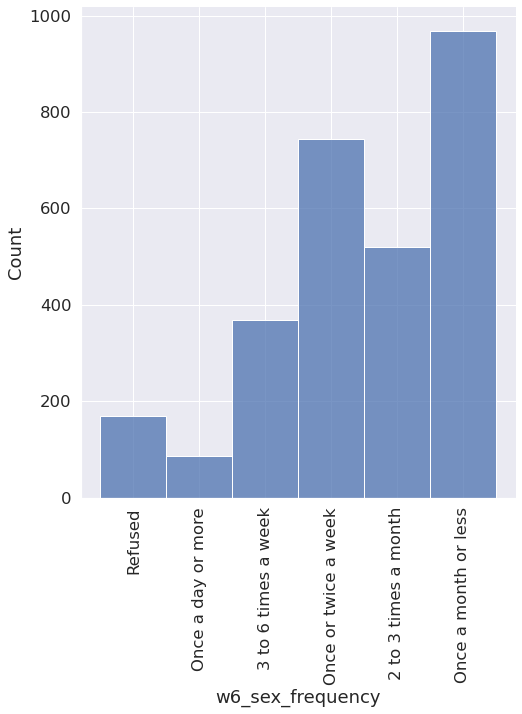

In [27]:
sns.set(font_scale=1.5)
sns.displot(data=couple_df, x="w6_sex_frequency", height=8)
plt.tick_params(axis='x', rotation=90)

In [2]:
df = pd.read_csv('./sex_data.csv')

In [5]:
df.head(50)

,field,Rater.Gender,Subj.Gender,Slut,Age Group,Age,Had Sex?,Age 1st time,Num. Partners,Sex Preference
0,1,Male,men,15,young,22,yes,16,14,females
1,2,Male,men,15,young,18,yes,14,7,females
2,3,Male,men,19,young,19,yes,14,12,females
3,4,Male,men,25,young,20,yes,13,32,males
4,5,Male,men,20,young,22,yes,15,18,females
5,6,Male,men,18,young,21,yes,13,7,females
6,7,Male,men,15,young,21,yes,13,17,females
7,8,Male,men,8,young,19,no,0,0,females
8,9,Male,men,3,young,24,yes,17,1,females
9,10,Male,men,2,young,20,yes,13,9,females


**Disclaimer**: Heart diease is a complicated issue. The purpose of this exercise is NOT to predict the onset of heart disease, but to practice statistical techniques.

In [4]:
df.shape

(115, 10)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
field,115.0,58.000000,33.341666,1.0,29.5,58.0,86.5,115.0
Slut,115.0,6.486957,5.848024,1.0,2.0,5.0,10.0,25.0
Age,115.0,42.313043,23.905283,18.0,21.0,25.0,66.5,90.0
Age 1st time,115.0,17.547826,3.991754,0.0,15.5,17.0,20.0,37.0
Num. Partners,115.0,7.747826,9.505163,0.0,2.0,5.0,9.0,61.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   field           115 non-null    int64 
 1   Rater.Gender    115 non-null    object
 2   Subj.Gender     115 non-null    object
 3   Slut            115 non-null    int64 
 4   Age Group       115 non-null    object
 5   Age             115 non-null    int64 
 6   Had Sex?        115 non-null    object
 7   Age 1st time    115 non-null    int64 
 8   Num. Partners   115 non-null    int64 
 9   Sex Preference  115 non-null    object
dtypes: int64(5), object(5)
memory usage: 9.1+ KB


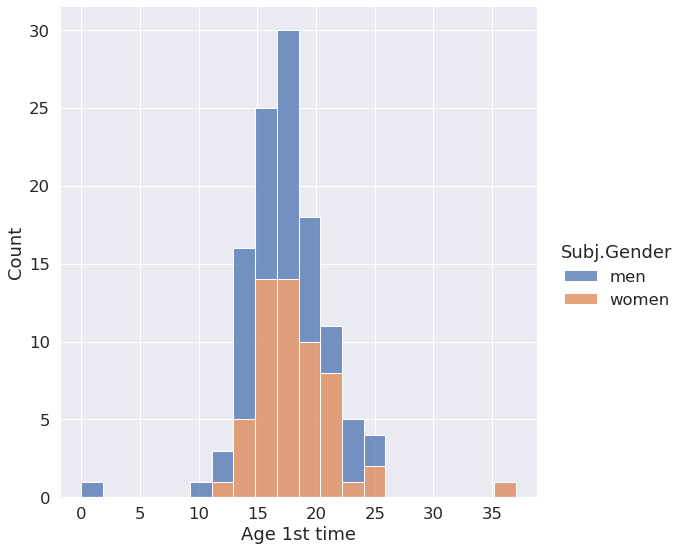

In [10]:
sns.set(font_scale=1.5)
sns.displot(data=df, x="Age 1st time", height=8, hue="Subj.Gender", multiple="stack")

<AxesSubplot:xlabel='Age 1st time', ylabel='Num. Partners'>

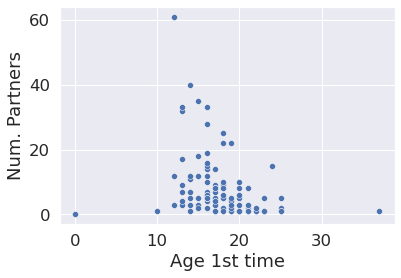

In [11]:
sns.scatterplot(data=df, x="Age 1st time", y="Num. Partners")

<AxesSubplot:xlabel='Slut', ylabel='Num. Partners'>

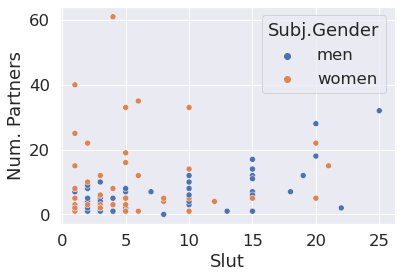

In [14]:
sns.scatterplot(data=df, x="Slut", y="Num. Partners", hue="Subj.Gender")

<AxesSubplot:xlabel='Age 1st time', ylabel='Slut'>

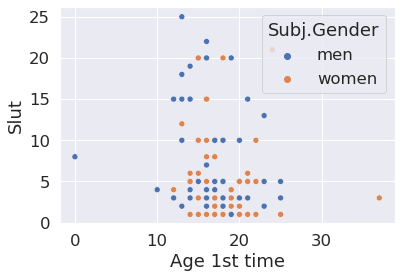

In [16]:
sns.scatterplot(data=df, x="Age 1st time", y="Slut", hue="Subj.Gender")

In [ ]:
population_of_interests = df[df["chol"] > 200]

In [ ]:
# This value will be used to examine the value we get by bootstrapping
population_mean = population_of_interests["age"].mean()

In [ ]:
sns.distplot(population_of_interests["age"])

## Beginning of Bootstrap

In [ ]:
sample_population = population_of_interests.sample(30, replace=True)

In [ ]:
sample_population.head(5)

## Normal/Gaussian Distribution:
**In a nutshell**: A bell shaped curve that flats out at both end of the peak. Many things that happen in nature follows this curve. For example, blood pressures of people who're still alive. The average blood pressure of healthy people is around 120 mm Hg. Most people that're alive is relatively health and have blood pressure close to that value, few people who are ill have blood pressure a bit far away from the average, and those who're significantly above or below that is either in dying or dead, so they're excluded from the population of interest.  
**y-axis**: Number of occurrence of a specific value.  
**x-axis**: Value of interest, such as blood pressure, age, resting heart rate.
![example](./nd_example.png)  
[image from Stack Overflow](https://stackoverflow.com/questions/10138085/python-plot-normal-distribution)

## Central Limit Therom
**In a nutshell**: If one draws repeatedly from a sample with replacement, calculate the statistic value of interest (e.g mean, median), and aggregate these values, then the distribution of thses value will be approximately normally distributed.  
There're no set rules on how many time we need to randomly draw from the sample, but a good place to start is 1000, and use intuition and observation to increase that number.

In [ ]:
n_iterations = 3000
n_size = len(t_sample)
sampling_means_distribution = []
# Run the loop 3000 times, draw random samples in each loop and get there mean
for i in range(n_iterations):
    resample = t_sample.sample(n_size, replace=True)
    resample_mean = resample["age"].mean()
    sampling_means_distribution.append(resample_mean)

In [ ]:
np_smd = np.array(sampling_means_distribution)

In [ ]:
sns.distplot(np_smd)

## Confidence Interval
**Bootstrapping** can **NOT** help us find the true value of the population of interests. Since we can't determine that value, we need a reasonable way to estimate that value the boostrapped value.  

Confidence Interval is a way we estimate that values of the population, in this case the mean age of the population who's level of cholesteral exceeds 200 mg/dL.  

**Confidence Interval** is a range of value (e.g. between 50 - 60) that we're think the statistic value (mean) of the population of interest lie within.

To construct a 95% Confidence Interval, we can sort the data from smallest to largest, and get the value that's on `data_length * 0.025` from the start and `data_length * 0.025` from the end.

In [ ]:
sorted_smd = np.sort(np_smd)

In [ ]:
# Get value from array and convert to integer.
lower_percentile = sorted_smd[int(n_iterations * n_size * 0.0025)]
upper_percentile = sorted_smd[int(n_iterations - lower_percentile)]

In [ ]:
confidence_interval = [lower_percentile, upper_percentile]

In this case, we could say we're 95% certain that the true mean of the population of interest is between 55 to 60.

In [ ]:
confidence_interval

In [ ]:
(round(population_mean) >=